## CNN Classifier For Traffic Sign Recognition

In this project a Convolutional Neural Network is built for Traffic Signs Recognition.
In this project the [German Traffic Signs Dateset](http://benchmark.ini.rub.de/) is used. The Network is trained using a CPU.


## The following steps have been followed to build this project:

#### 1. Load the data and prepare the train, the validation and the test sets.
#### 2. Get a statistical summary for the different sets and visulaize some data.
#### 3. Design a model architecture for the CNN.
#### 4. Train the model using the train data set and validate it using the validation data set.
#### 5. Test the final model architecture using the test set.
### 6. Testing the final model on new images

---
### 1. Load the data and prepare the train, the validation and the test sets.
The data sets are prepared as follows:
* 1.1 Load the data sets with their labels.
* 1.2 Converting the images from RGB to Gray scale.
* 1.3 Normalizing the images.


In [2]:
# 1.1 Load the data sets with their labels
# Load pickled data
import pickle
import pandas as pd
import cv2
import numpy as np

# Path to the data sets
training_file = "/home/mostafa/Desktop/keras/CNN classifier for Traffic Signs Recognition//traffic-signs-data/train.p"
validation_file="/home/mostafa/Desktop/keras/CNN classifier for Traffic Signs Recognition//traffic-signs-data/valid.p"
testing_file = "/home/mostafa/Desktop/keras/CNN classifier for Traffic Signs Recognition//traffic-signs-data/test.p"

#Load the data sets
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
#Data sets of RGB (32x32x3) images and thier lables    
X_trainrgb, y_train = train['features'], train['labels']
X_validationrgb, y_validation = valid['features'], valid['labels']
X_testrgb, y_test = test['features'], test['labels']




In [3]:
# 1.2 Converting the images from RGB to Gray scale
X_train=[]
X_validation=[]
X_test=[]
for item in X_trainrgb:
    X_train.append(cv2.cvtColor(item,cv2.COLOR_RGB2GRAY))
    
for item in X_validationrgb:
    X_validation.append(cv2.cvtColor(item,cv2.COLOR_RGB2GRAY))
    
for item in X_testrgb:
    X_test.append(cv2.cvtColor(item,cv2.COLOR_RGB2GRAY))

X_train=np.array(X_train)
X_train=X_train.reshape(len(X_train),32,32,1)

X_validation=np.array(X_validation).reshape((len(X_validation),32,32,1))
X_test=np.array(X_test).reshape((len(X_test),32,32,1))

In [4]:
# 1.3 Normalizing the images
X_train=(X_train-np.mean(X_train))/np.std(X_train)
X_validation=(X_validation-np.mean(X_validation))/np.std(X_validation)
X_test=(X_test-np.mean(X_test))/np.std(X_test)

---

## 2. Get a statistical summary for the different sets and visualize some data.
In the sets we have, we can find that:
* Number of training examples = 34799
* Number of validation examples = 4410
* Number of test examples = 34799
* Image shape is (32,32,1)
* Number of classes = 43



In [5]:
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(train['features'])

# Number of validation examples
n_validation = len(valid['features'])

# Number of testing examples.
n_test = len(test['features'])

#The shape of an traffic sign image
image_shape = X_train[0,:].shape

# classes/labels in the dataset.
signs=pd.read_csv("./signnames.csv")

n_classes = len(signs)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
#print("signs shape =", signs.loc[40][1])

Number of training examples = 34799
Number of testing examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Number of classes = 43


22
Bumpy road


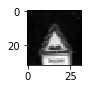

In [6]:
# Visualize Data
#View a sample from the dataset.

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')
print(y_train[index])
print(signs.loc[y_train[index]][1])


---
## 3. Design a model architecture for the CNN.
* 3.1. first we will import the modules that we need.
* 3.2. Shuffle the training set for better learning
* 3.3. Then, we will build our model as a function whose output will be the input of the softmax function 
* The final model consists of the following layers
*  
*  Input         		( 32x32x1 Gray scale image ) 					 
*  Convolution 5x5    	( 1x1 stride, VALID padding, outputs 28x28x6)
*  RELU                
*  Convolution 5x5		( 1x1 stride, VALID padding, outputs 24x24x6)
*  RELU																
*  Convolution 5x5		( 1x1 stride, VALID padding, outputs 20x20x16)
*  RELU				
*  Max pooling	      	( 2x2 stride,  outputs 10x10x16) 				
*  Fully Connected	    ( input=10x10x16	output=120)				
*  RELU				
*  Fully connected		( input=120			output=84 )
*  RELU				
*  Dropout				( peak= 0.75 )					
*  Fully connected		( input=84			output=43 )
*  Softmax				( Softmax cross entropy using one_hot_encoding ) 
 						
 						


In [7]:
# 3.1. Import the modules that we need
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import cv2


In [8]:
# 3.2. Shuffle the trainig set for better learning
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


In [9]:
# 3.3. Build our model as a function
def modelNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # RELU: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Layer 2: Convolutional. Input = 28x28x6. Output = 24x24x6.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 6), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(6))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # RELU: Activation.
    conv2 = tf.nn.relu(conv2)

    
    # Layer 3: Convolutional. Input= 24x24x6. Output = 20x20x16.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(16))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # RELU: Activation.
    conv3 = tf.nn.relu(conv3)

    # Pooling. Input = 20x20x16. Output = 10x10x16.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = (10,10,16). Output = 10x10x16.
    fc0   = flatten(conv3)
    
    # Layer 4: Fully Connected. Input = 10x10x16. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(10*10*16, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # RELU: Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 5: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # RELU: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2 =tf.nn.dropout(fc2,p)
    
    # Layer 6: Fully Connected. Input = 84. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc4_W) + fc4_b
    
    return logits


---
## 4. Train the model using the train data set and validate it using the validation data set.
The model can be trained by following the next steps:
* 4.1. Choosing the hyperparameters ( learning rate, epochs, batch size)
* 4.2. Making placeholders for the input, the ouput and the dropout peak
* 4.3. Setting up the loss function and the optimizer
* 4.4. Definig an evaluation function to be used for cross validation
* 4.5. Train the model and save the parameters

In [10]:
# 4.1. Choosing the hyperparameters
EPOCHS = 20
BATCH_SIZE = 128
rate = 0.001

In [11]:
# 4.2. Placeholders for the input, the ouput and the dropout peak
x = tf.placeholder(tf.float32, (None, 32, 32,1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
p=tf.placeholder(tf.float32)

In [12]:
# 4.3. Setting up the loss function and the optimizer
logits = modelNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


In [13]:
# 4.4. Definig an evaluation function to be used for cross validation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver() #To save the model parameters (weights, biases)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, p:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,p:0.75})            
        # Validation
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    saver.save(sess, './modelnet')
    print("Model saved")
        
            
        

Training...

EPOCH 1 ...
Validation Accuracy = 0.900

EPOCH 2 ...
Validation Accuracy = 0.932

EPOCH 3 ...
Validation Accuracy = 0.946

EPOCH 4 ...
Validation Accuracy = 0.951

EPOCH 5 ...
Validation Accuracy = 0.947

EPOCH 6 ...
Validation Accuracy = 0.949

EPOCH 7 ...
Validation Accuracy = 0.956

EPOCH 8 ...
Validation Accuracy = 0.955

EPOCH 9 ...
Validation Accuracy = 0.951

EPOCH 10 ...
Validation Accuracy = 0.957

EPOCH 11 ...
Validation Accuracy = 0.963

EPOCH 12 ...
Validation Accuracy = 0.954

EPOCH 13 ...
Validation Accuracy = 0.962

EPOCH 14 ...
Validation Accuracy = 0.960

EPOCH 15 ...
Validation Accuracy = 0.966

EPOCH 16 ...
Validation Accuracy = 0.957

EPOCH 17 ...
Validation Accuracy = 0.964

EPOCH 18 ...
Validation Accuracy = 0.962

EPOCH 19 ...
Validation Accuracy = 0.956

EPOCH 20 ...
Validation Accuracy = 0.964

Model saved


---
## 5. Test the final model architecture on the test set.
The saved model is restored an tested on the test set

In [14]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.944


---
## 6. Test the final model architecture on a new data set.
The model is tested on a set of five images downloaded from the internet
The five signs are represented first, then the softmax prediction.
The title of every softmax subplot is the name of the sign with the highest probability.

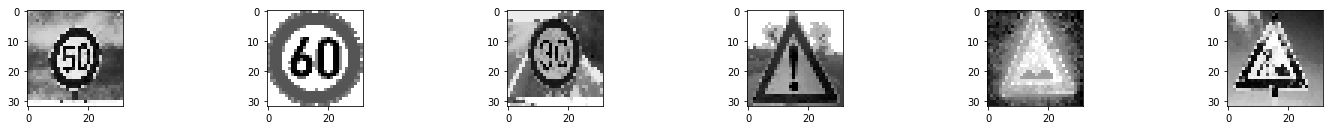

In [20]:
# New images are appended in numpy array and shown.
new_images=[]
new_images.append(cv2.equalizeHist(cv2.cvtColor(cv2.resize(cv2.imread('./new_images/1.jpg'),(32,32)),cv2.COLOR_RGB2GRAY)))
new_images.append(cv2.equalizeHist(cv2.cvtColor(cv2.resize(cv2.imread('./new_images/2.jpg'),(32,32)),cv2.COLOR_RGB2GRAY)))
new_images.append(cv2.equalizeHist(cv2.cvtColor(cv2.resize(cv2.imread('./new_images/3.jpg'),(32,32)),cv2.COLOR_RGB2GRAY)))
new_images.append(cv2.equalizeHist(cv2.cvtColor(cv2.resize(cv2.imread('./new_images/4.jpg'),(32,32)),cv2.COLOR_RGB2GRAY)))
new_images.append(cv2.equalizeHist(cv2.cvtColor(cv2.resize(cv2.imread('./new_images/5.jpg'),(32,32)),cv2.COLOR_RGB2GRAY)))
new_images.append(cv2.equalizeHist(cv2.cvtColor(cv2.resize(cv2.imread('./new_images/7.jpg'),(32,32)),cv2.COLOR_RGB2GRAY)))
#new_images.append(cv2.equalizeHist(cv2.cvtColor(cv2.resize(cv2.imread('./new_images/8.jpg'),(32,32)),cv2.COLOR_RGB2GRAY)))

#new_images.append(cv2.cvtColor(cv2.resize(cv2.imread('./new_images/6.png'),(32,32)),cv2.COLOR_RGB2GRAY))
new_images=np.array(new_images).reshape(np.size(new_images,axis=0),32,32,1)
#new_images=(new_images-np.mean(new_images))/np.std(new_images)
#new_images=cv2.equalizeHist(new_images)
for i in range (np.size(new_images,axis=0)):
    plt.subplot(1,np.size(new_images,axis=0),i+1)
    plt.subplots_adjust(0.1,2.1,3.1,5.1,wspace=1.5)
    plt.imshow(new_images[i,:,:,0],cmap='gray')
    

new_labels=np.array([2,3,1,18,22,25])

In [21]:
plt.imsave('./new_images/1.png',new_images[0,:,:,0],cmap='gray')
plt.imsave('./new_images/2.png',new_images[1,:,:,0],cmap='gray')
plt.imsave('./new_images/3.png',new_images[2,:,:,0],cmap='gray')
plt.imsave('./new_images/4.png',new_images[3,:,:,0],cmap='gray')
plt.imsave('./new_images/5.png',new_images[4,:,:,0],cmap='gray')
plt.imsave('./new_images/6.png',new_images[5,:,:,0],cmap='gray')


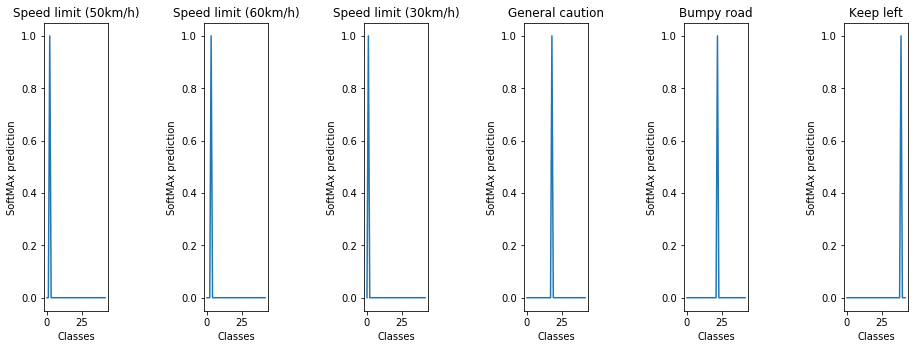

In [207]:
# Softmax predicition is calculated then the results are plotted against the classes. the title of every subplot
# is the class with the highest probability.
prob=tf.nn.softmax(logits)
prob5=tf.nn.top_k(prob,k=5)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    mylogits=sess.run(prob,feed_dict={x:new_images, p:1})
    logits5=sess.run(prob5,feed_dict={x:new_images, p:1})
    

for i in range (np.size(new_images,axis=0)):
    plt.subplot(1,np.size(new_images,axis=0),i+1)
    plt.subplots_adjust(0.1,2.1,2.1,3.1,wspace=1.5)
    title=logits5.indices[i][0]
    plt.title(signs.loc[title][1])
    plt.plot(mylogits[i,:])
    plt.xlabel("Classes")
    plt.ylabel("SoftMAx prediction")
    


In [208]:
#Test Accuracy on the new set
with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(new_images, new_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    

Test Accuracy = 0.833
